In [17]:
#Don't forget to save your work to your local computer and push to GitHub.
#File -> Download as -> Notebook
#Move file from download folder to local repo clone
#git add filename.ipynb
#git commit -m "put a specific and informative message here of what you worked on"
#git push

In [18]:
import pandas
import os

from IPython.display import display, HTML

''' 
#Disabline this code chunk since we will not be using survey data. DELETE code chunk entirely?
# This query represents dataset "AS_KG_Dataset" for domain "survey" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_survey_sql = """
    SELECT
        answer.person_id,
        answer.survey_datetime,
        answer.survey,
        answer.question_concept_id,
        answer.question,
        answer.answer_concept_id,
        answer.answer,
        answer.survey_version_concept_id,
        answer.survey_version_name  
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.ds_survey` answer   
    WHERE
        (
            question_concept_id IN (
                SELECT
                    DISTINCT concept_id 
                FROM
                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                JOIN
                    (
                        select
                            cast(cr.id as string) as id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                        WHERE
                            concept_id IN (
                                1586134,43528895,40192389
                            ) 
                            AND domain_id = 'SURVEY'
                    ) a 
                        ON (
                            c.path like CONCAT('%',
                        a.id,
                        '.%')) 
                    WHERE
                        domain_id = 'SURVEY' 
                        AND type = 'PPI' 
                        AND subtype = 'QUESTION'
                    )
            )  
            AND (
                answer.PERSON_ID IN (
                    SELECT
                        distinct person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                    WHERE
                        cb_search_person.person_id IN (
                            SELECT
                                criteria.person_id 
                            FROM
                                (SELECT
                                    DISTINCT person_id,
                                    entry_date,
                                    concept_id 
                                FROM
                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                WHERE
                                    (
                                        concept_id IN (
                                            SELECT
                                                DISTINCT c.concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                            JOIN
                                                (
                                                    select
                                                        cast(cr.id as string) as id 
                                                    FROM
                                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                    WHERE
                                                        concept_id IN (36712702, 45757176, 4014295) 
                                                        AND full_text LIKE '%_rank1]%'
                                                ) a 
                                                    ON (
                                                        c.path LIKE CONCAT('%.',
                                                    a.id,
                                                    '.%') 
                                                    OR c.path LIKE CONCAT('%.',
                                                    a.id) 
                                                    OR c.path LIKE CONCAT(a.id,
                                                    '.%') 
                                                    OR c.path = a.id) 
                                                WHERE
                                                    is_standard = 1 
                                                    AND is_selectable = 1
                                                ) 
                                                AND is_standard = 1 
                                        )
                                    ) criteria 
                                ) ))"""

dataset_30352193_survey_df = pandas.read_gbq(
    dataset_30352193_survey_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_survey_df.head(5)
'''

# Hide the output
display(HTML('<style>.output_wrapper {display: none}</style>'))

In [19]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "condition" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_condition_sql = """
    SELECT
        c_occurrence.person_id,
        c_occurrence.condition_concept_id,
        c_standard_concept.concept_name as standard_concept_name,
        c_standard_concept.concept_code as standard_concept_code,
        c_standard_concept.vocabulary_id as standard_vocabulary,
        c_occurrence.condition_start_datetime,
        c_occurrence.condition_end_datetime,
        c_occurrence.condition_type_concept_id,
        c_type.concept_name as condition_type_concept_name,
        c_occurrence.stop_reason,
        c_occurrence.visit_occurrence_id,
        visit.concept_name as visit_occurrence_concept_name,
        c_occurrence.condition_source_value,
        c_occurrence.condition_source_concept_id,
        c_source_concept.concept_name as source_concept_name,
        c_source_concept.concept_code as source_concept_code,
        c_source_concept.vocabulary_id as source_vocabulary,
        c_occurrence.condition_status_source_value,
        c_occurrence.condition_status_concept_id,
        c_status.concept_name as condition_status_concept_name 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.condition_occurrence` c_occurrence 
        WHERE
            (
                condition_concept_id IN  (
                    SELECT
                        DISTINCT c.concept_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    JOIN
                        (
                            select
                                cast(cr.id as string) as id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            WHERE
                                concept_id IN (
                                    36712702, 4014295, 44784550, 45757175, 45757176
                                ) 
                                AND full_text LIKE '%_rank1]%'
                        ) a 
                            ON (
                                c.path LIKE CONCAT('%.',
                            a.id,
                            '.%') 
                            OR c.path LIKE CONCAT('%.',
                            a.id) 
                            OR c.path LIKE CONCAT(a.id,
                            '.%') 
                            OR c.path = a.id) 
                        WHERE
                            is_standard = 1 
                            AND is_selectable = 1
                        )
                )  
                AND (
                    c_occurrence.PERSON_ID IN (
                        SELECT
                            distinct person_id  
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                        WHERE
                            cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (
                                                SELECT
                                                    DISTINCT c.concept_id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                                JOIN
                                                    (
                                                        select
                                                            cast(cr.id as string) as id 
                                                        FROM
                                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                        WHERE
                                                            concept_id IN (36712702, 45757176, 4014295) 
                                                            AND full_text LIKE '%_rank1]%'
                                                    ) a 
                                                        ON (
                                                            c.path LIKE CONCAT('%.',
                                                        a.id,
                                                        '.%') 
                                                        OR c.path LIKE CONCAT('%.',
                                                        a.id) 
                                                        OR c.path LIKE CONCAT(a.id,
                                                        '.%') 
                                                        OR c.path = a.id) 
                                                    WHERE
                                                        is_standard = 1 
                                                        AND is_selectable = 1
                                                    ) 
                                                    AND is_standard = 1 
                                            )
                                        ) criteria 
                                    ) ))
                        ) c_occurrence 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_standard_concept 
                            ON c_occurrence.condition_concept_id = c_standard_concept.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_type 
                            ON c_occurrence.condition_type_concept_id = c_type.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                            ON c_occurrence.visit_occurrence_id = v.visit_occurrence_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` visit 
                            ON v.visit_concept_id = visit.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_source_concept 
                            ON c_occurrence.condition_source_concept_id = c_source_concept.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_status 
                            ON c_occurrence.condition_status_concept_id = c_status.concept_id"""

dataset_30352193_condition_df = pandas.read_gbq(
    dataset_30352193_condition_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_condition_df.head(5)

Downloading:   0%|          | 0/44593 [00:00<?, ?rows/s]

In [20]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "person" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_person_sql = """
    SELECT
        person.person_id,
        person.gender_concept_id,
        p_gender_concept.concept_name as gender,
        person.birth_datetime as date_of_birth,
        person.race_concept_id,
        p_race_concept.concept_name as race,
        person.ethnicity_concept_id,
        p_ethnicity_concept.concept_name as ethnicity,
        person.sex_at_birth_concept_id,
        p_sex_at_birth_concept.concept_name as sex_at_birth 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.person` person 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_gender_concept 
            ON person.gender_concept_id = p_gender_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_race_concept 
            ON person.race_concept_id = p_race_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_ethnicity_concept 
            ON person.ethnicity_concept_id = p_ethnicity_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_sex_at_birth_concept 
            ON person.sex_at_birth_concept_id = p_sex_at_birth_concept.concept_id  
    WHERE
        person.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) )  
                    AND (person.PERSON_ID IN (SELECT
                        DISTINCT person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` 
                    WHERE
                        has_ehr_data = 1))"""

dataset_30352193_person_df = pandas.read_gbq(
    dataset_30352193_person_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_person_df.head(5)

Downloading:   0%|          | 0/17524 [00:00<?, ?rows/s]

In [21]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "zip_code_socioeconomic" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_zip_code_socioeconomic_sql = """
    SELECT
        observation.person_id,
        observation.observation_datetime,
        zip_code.zip3_as_string as zip_code,
        zip_code.fraction_assisted_income as assisted_income,
        zip_code.fraction_high_school_edu as high_school_education,
        zip_code.median_income,
        zip_code.fraction_no_health_ins as no_health_insurance,
        zip_code.fraction_poverty as poverty,
        zip_code.fraction_vacant_housing as vacant_housing,
        zip_code.deprivation_index,
        zip_code.acs as american_community_survey_year 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.zip3_ses_map` zip_code 
    JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.observation` observation 
            ON CAST(SUBSTR(observation.value_as_string,
        0,
        STRPOS(observation.value_as_string,
        '*') - 1) AS INT64) = zip_code.zip3  
    WHERE
        observation.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) ) 
                    AND observation_source_concept_id = 1585250 
                    AND observation.value_as_string NOT LIKE 'Res%'"""

dataset_30352193_zip_code_socioeconomic_df = pandas.read_gbq(
    dataset_30352193_zip_code_socioeconomic_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_zip_code_socioeconomic_df.head(5)

Downloading:   0%|          | 0/17517 [00:00<?, ?rows/s]

In [22]:
#Packages needed
import pandas as pd

In [23]:
#Rename dataframes to be easier to work with

# df1

# the columns question_concept_id, answer_concept_id, survey_version_concept_id
# throw problems and aren't helpful, so I'm going to drop them here

# every entry in survey_version_name is None, so I'm dropping that column as well

# the entries in survey, are all one of 'The Basics', 'Healthcare Access & Utilization',
# or 'Social Determinants of Health'. I'm dropping this column too

# actually, the remaining columns are asking if the person is deaf (question, answer are separate columns),
# and the datetime of the survey. I don't think we are going to use any of these,
# so I'm actually just not going to use df1

#df1 = dataset_30352193_survey_df.drop(columns=["question_concept_id", "answer_concept_id", "survey_version_concept_id", "survey_version_name"])






# df2 

# the columns 'condition_concept_id', 'condition_type_concept_id', 'visit_occurrence_id', 
# 'condition_source_concept_id', 'condition_status_concept_id' throw problems
# and aren't helpful, so I'm going to drop them at the beginning

# 'standard_concept_code' is just a code for 'standard_concept_name', so I'm dropping it

# 'standard_vocabulary' is always 'SNOMED', so I'm dropping it
# 'stop_reason' is always 'None', so I'm dropping it

# 'condition_source_value' and 'source_concept_code' have the same codes, same value counts,
# and match in the first few rows, so I'm dropping 'source_concept_code'

# 'condition_source_value' and 'source_concept_name' are almost the same ('source_concept_name'
# combines two values into the same name twice), but not identical

# 'condition_source_value' and 'condition_status_source_value' are almost the same,
# but some things in 'condition_source_value' yield 'no matching concept' in 'condition_status_source_value'

# 'condition_status_concept_name' are the names for 'condition_status_source_value'

# for now, I'm keeping 'source_concept_name' and 'condition_status_concept_name',
# and dropping 'condition_source_value' and 'condition_status_source_value'

df2_drop_columns = ['condition_concept_id', 'condition_type_concept_id', 'visit_occurrence_id',]
df2_drop_columns.extend(['condition_source_concept_id', 'condition_status_concept_id', 'standard_concept_code'])
df2_drop_columns.extend(['standard_vocabulary', 'stop_reason', 'source_concept_code'])
df2_drop_columns.extend(['condition_source_value', 'condition_status_source_value'])

df2 = dataset_30352193_condition_df.drop(columns=df2_drop_columns)



# df3

# Dropping 'gender_concept_id', keeping 'gender'
# Dropping 'race_concept_id', keeping 'race'
# Dropping 'ethnicity_concept_id', keeping 'ethnicity'
# Dropping 'sex_at_birth_concept_id', keeping 'sex_at_birth'

df3_drop_columns = ['gender_concept_id', 'race_concept_id', 'ethnicity_concept_id', 'sex_at_birth_concept_id']

df3 = dataset_30352193_person_df.drop(columns=df3_drop_columns)



# df4

# note this wikipedia list of zip_code prefixes (i.e. first 3 digits):
# https://en.wikipedia.org/wiki/List_of_ZIP_Code_prefixes

# Not currently dropping any values from df4

df4 = dataset_30352193_zip_code_socioeconomic_df

In [24]:
# create a dictionary of values of person_id and multiplicities in each data frame

## start by creating sets of unique ids

#unique_ids1 = list(df1.person_id.unique())

unique_ids2 = list(df2.person_id.unique())
unique_ids3 = list(df3.person_id.unique())
unique_ids4 = list(df4.person_id.unique())

In [25]:
## create a set of values of person_id that occur in each data frame
## we then sort common_ids in ascending order

## since we only have four data frames, easy to construct full hierarchy, if we want

common_ids = []

for pid in unique_ids2:
    if (pid in unique_ids3) and (pid in unique_ids4):
        common_ids.append(pid)

common_ids.sort()
        
## print(len(common_ids))
## As of 27 Oct 2023, len(common_ids) = 17517, both with and without df1

In [26]:
## restrict df1, df2, df3, df4 to rows with personal_id values in common_ids

## I think it will be helpful to sort the restricted data frames
## Also, we sort by person_id

# restricted1 = df1[df1["person_id"].isin(common_ids)].sort_values(by=["person_id"]).copy()

restricted2 = df2[df2["person_id"].isin(common_ids)].sort_values(by=["person_id"]).copy()
restricted3 = df3[df3["person_id"].isin(common_ids)].sort_values(by=["person_id"]).copy()
restricted4 = df4[df4["person_id"].isin(common_ids)].sort_values(by=["person_id"]).copy()

In [27]:
## since only df1 and df2 have rows with repeated person_id values,
## we create dictionaries for df1 and df2 to track how many times
## each element of common_ids occurs as a person_id value

#dict1 = {}

#for pid in restricted1.person_id:
#    if pid in dict1.keys():
#        dict1[pid] += 1
#    else:
#        dict1[pid] = 1

dict2 = {}

for pid in restricted2.person_id:
    if pid in dict2.keys():
        dict2[pid] += 1
    else:
        dict2[pid] = 1
        
#print(dict1)
#print(dict2)

In [30]:
## assuming that we want to keep data from each row in the restricted frame,
## we now find the highest multiplicity, so we now determine how many columns we will need

## currently, I am assuming that df1, df2, df3, df4 all distinct columns in our actual data, apart from person_id
## if this isn't true, it will be easy to fix in the future

## note that we have only restricted the rows, columns are still the same, so df1.columns = restricted1.columns

#dict1_mult = max(dict1.values())
dict2_mult = max(dict2.values())

#print(dict1_mult)

print("df3 has " + str(len(df3.columns)) + " columns, including the personal id column,\
      so df3 will add " + str(len(df3.columns)-1) + " columns")
print("df4 has " + str(len(df4.columns)) + " columns, including the personal id column,\
      so df4 will add " + str(len(df4.columns)-1) + " columns")

print(" ")

#print("df1 has " + str(len(df1.columns)) + " columns, including the personal id column")
#print("Since the highest multiplicity in dict1 is " + str(dict1_mult) + ", df1 will add")
#print(str(dict1_mult) + "(" + str( len(df1.columns) ) + "-1) = " + str( dict1_mult*(len(df1.columns)-1) ) + " columns")

#print(" ")

print("df2 has " + str(len(df2.columns)) + " columns, including the personal id column")
print("Since the highest multiplicity in dict2 is " + str(dict2_mult) + ", df2 will add")
print(str(dict2_mult) + "(" + str( len(df2.columns) ) + "-1) = " + str( dict2_mult*(len(df2.columns)-1) ) + " columns" )

print(" ")

#total_cols = len(df3.columns) + len(df4.columns) - 1 + dict1_mult*(len(df1.columns)-1) + dict2_mult*(len(df2.columns)-1)
total_cols = len(df3.columns) + len(df4.columns) - 1 + dict2_mult*(len(df2.columns)-1)

print("Our new data frame will have " + str(total_cols) + " columns")

df3 has 6 columns, including the personal id column,      so df3 will add 5 columns
df4 has 11 columns, including the personal id column,      so df4 will add 10 columns
 
df2 has 9 columns, including the personal id column
Since the highest multiplicity in dict2 is 49, df2 will add
49(9-1) = 392 columns
 
Our new data frame will have 408 columns


In [31]:
## we now create a new data frame with the appropriate number of columns

col_list = []

for col in df3.columns:
    if col == "person_id":
        col_list.append(col)
    else:
        col_list.append(col+"_df3")

for col in df4.columns:
    if col != "person_id":
        col_list.append(col+"_df4")

#for index in range(1,dict1_mult+1):
#    for col in df1.columns:
#        if col != "person_id":
#            col_list.append(col+"_df1_"+str(index))

for index in range(1,dict2_mult+1):
    for col in df2.columns:
        if col != "person_id":
            col_list.append(col+"_df2_"+str(index))

combined_df = pd.DataFrame(columns=col_list)

combined_df.head()

,person_id,gender_df3,date_of_birth_df3,race_df3,ethnicity_df3,sex_at_birth_df3,observation_datetime_df4,zip_code_df4,assisted_income_df4,high_school_education_df4,...,source_vocabulary_df2_48,condition_status_concept_name_df2_48,standard_concept_name_df2_49,condition_start_datetime_df2_49,condition_end_datetime_df2_49,condition_type_concept_name_df2_49,visit_occurrence_concept_name_df2_49,source_concept_name_df2_49,source_vocabulary_df2_49,condition_status_concept_name_df2_49


In [32]:
## we will now populate our new data frame, combined_df, with rows
## for each value pid of person_id in common_ids, we will create a row with person_id=pid and all other columns="temp"
## we also set the index of combined_df to person_id
## I had added a step here to sort by person_id, but instead I sorted common_ids after it was created

## When using all columns and including df1, I observed the following:
## This takes awhile, I'm going to sample it a subset of about 1000 of the common_ids (common_ids_sub_1)
## Takes about 2 mins, 30 secs to do 1000.
## I imagine the slow part is concatenating every step. I'll think about making this faster.

## Without df1 and all of the columns, I observed:
## While still using only the first 1000 common_ids, it now takes about 25 sec.

## Without df1 and all of the columns, I observed:
## While using common_ids, I let it run for 16 minutes and it didn't finish yet.
## It's late though, so I'm going to continue using common_ids_sub_1 and we can address this later

common_ids_sub_1 = common_ids[0:1000]


temp_dict = {}
for col in col_list:
    if col != "person_id":
        temp_dict[col] = ["temp"]

for pid in common_ids_sub_1:
    pid_dict = {"person_id":pid}
    pid_dict.update(temp_dict)
    pid_df = pd.DataFrame(pid_dict)
    combined_df = pd.concat([combined_df, pid_df])

#combined_df.sort_values(by=["person_id"])
combined_df.set_index("person_id", inplace=True)

    
combined_df.head(10)

,gender_df3,date_of_birth_df3,race_df3,ethnicity_df3,sex_at_birth_df3,observation_datetime_df4,zip_code_df4,assisted_income_df4,high_school_education_df4,median_income_df4,...,source_vocabulary_df2_48,condition_status_concept_name_df2_48,standard_concept_name_df2_49,condition_start_datetime_df2_49,condition_end_datetime_df2_49,condition_type_concept_name_df2_49,visit_occurrence_concept_name_df2_49,source_concept_name_df2_49,source_vocabulary_df2_49,condition_status_concept_name_df2_49
person_id,,,,,,,,,,,,,,,,,,,,,
1000104,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000109,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000131,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000195,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000291,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000724,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1001000,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1001034,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1001161,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp


In [33]:
## next want to fill in combined_df with actual values from restricted1, restricted2, restricted3, restricted4

## for restricted3 and restricted4, there are unique rows for each value of person_id, so we start with those

## note that we must first update the columns in restricted3 and restricted4 to match combined_df
## we start with restricted3

## note that we are currently using common_ids_sub_1 instead of common_ids

col3_dict = {}

for col in df3.columns:
    if col != "person_id":
        col3_dict[col] = col + "_df3"

restricted3.rename(columns=col3_dict, inplace=True)

restricted3.set_index("person_id", inplace=True)

for col in restricted3.columns:
    if col != "person_id":
        for pid in common_ids_sub_1:
            combined_df.loc[pid][col] = restricted3.loc[pid][col]

combined_df.head(10)

,gender_df3,date_of_birth_df3,race_df3,ethnicity_df3,sex_at_birth_df3,observation_datetime_df4,zip_code_df4,assisted_income_df4,high_school_education_df4,median_income_df4,...,source_vocabulary_df2_48,condition_status_concept_name_df2_48,standard_concept_name_df2_49,condition_start_datetime_df2_49,condition_end_datetime_df2_49,condition_type_concept_name_df2_49,visit_occurrence_concept_name_df2_49,source_concept_name_df2_49,source_vocabulary_df2_49,condition_status_concept_name_df2_49
person_id,,,,,,,,,,,,,,,,,,,,,
1000104,Female,1965-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000109,Female,1967-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000131,"Not man only, not woman only, prefer not to an...",2002-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000195,Female,1982-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000291,Female,1962-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000724,Female,1999-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1001000,Female,1999-06-15 00:00:00+00:00,Black or African American,Hispanic or Latino,Female,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1001034,Female,1989-06-15 00:00:00+00:00,None of these,What Race Ethnicity: Race Ethnicity None Of These,Female,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1001161,Female,1989-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,temp,temp,temp,temp,temp,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp


In [34]:
## now we do the same thing with restricted4

## note that we are currently using common_ids_sub_1 instead of common_ids

col4_dict = {}

for col in df4.columns:
    if col != "person_id":
        col4_dict[col] = col + "_df4"

restricted4.rename(columns=col4_dict, inplace=True)

restricted4.set_index("person_id", inplace=True)

for col in restricted4.columns:
    if col != "person_id":
        for pid in common_ids_sub_1:
            combined_df.loc[pid][col] = restricted4.loc[pid][col]

combined_df.head(10)

,gender_df3,date_of_birth_df3,race_df3,ethnicity_df3,sex_at_birth_df3,observation_datetime_df4,zip_code_df4,assisted_income_df4,high_school_education_df4,median_income_df4,...,source_vocabulary_df2_48,condition_status_concept_name_df2_48,standard_concept_name_df2_49,condition_start_datetime_df2_49,condition_end_datetime_df2_49,condition_type_concept_name_df2_49,visit_occurrence_concept_name_df2_49,source_concept_name_df2_49,source_vocabulary_df2_49,condition_status_concept_name_df2_49
person_id,,,,,,,,,,,,,,,,,,,,,
1000104,Female,1965-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2019-05-13 18:21:26+00:00,100**,17.355981,85.665558,83951.707638,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000109,Female,1967-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2019-06-19 20:17:10+00:00,104**,38.279736,70.896923,39407.415829,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000131,"Not man only, not woman only, prefer not to an...",2002-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2021-09-09 17:18:12+00:00,853**,13.019775,85.134547,61580.823283,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000195,Female,1982-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2019-04-15 19:33:14+00:00,104**,38.279736,70.896923,39407.415829,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000291,Female,1962-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2020-02-07 16:09:49+00:00,100**,17.355981,85.665558,83951.707638,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1000724,Female,1999-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2017-09-19 13:40:32+00:00,154**,20.910346,88.333925,42632.000716,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1001000,Female,1999-06-15 00:00:00+00:00,Black or African American,Hispanic or Latino,Female,2020-02-13 18:47:27+00:00,927**,15.58751,66.084673,69333.203649,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1001034,Female,1989-06-15 00:00:00+00:00,None of these,What Race Ethnicity: Race Ethnicity None Of These,Female,2019-05-17 18:48:39+00:00,850**,18.509215,78.387333,54223.044605,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp
1001161,Female,1989-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2018-11-28 21:06:26+00:00,104**,38.279736,70.896923,39407.415829,...,temp,temp,temp,temp,temp,temp,temp,temp,temp,temp


### Currently skipping this cell, switching it to markdown for now

##### we now handle the cases of restricted1
##### for a fixed pair of values (pid,col) of person_id and a column from restricted1, 
##### we can create a new data frame - mini_df - with the correct number of columns and correct column names
##### we can then update the entries in combined_df accordingly

col1 = []

for col in df1.columns:
    if col != "person_id":
        col1.append(col)

##### recall dict1_mult is the maximal multiplicity of a person_id value in restricted1

##### note that we are currently using common_ids_sub_1 instead of common_ids

max = dict1_mult

##### some columns are weird and the .tolist() method does not work
##### question_concept_id, answer_concept_id, survey_version_id throw problems and aren't helpful,
##### so I'm going to drop them at the beginning

      
for pid in common_ids_sub_1:
    for col in col1:
        col_values = restricted1[restricted1["person_id"] == pid][col].values.tolist()
        mini_df_cols = []
        for index in range(1,max+1):
            mini_df_cols.append(col+"_df1_"+str(index))
        mini_df_dict = {}
        for index in range(0,len(col_values)):
            mini_df_dict[mini_df_cols[index]] = [col_values[index]]
        for index in range(len(col_values),max):
            mini_df_dict[mini_df_cols[index]] = ["N/A"]
        mini_df = pd.DataFrame(mini_df_dict)
        for newcol in mini_df_cols:
            combined_df.loc[pid][newcol] = mini_df.loc[0][newcol]

        
combined_df.head(10)

In [35]:
## we now repeat what we did for restricted1 for restricted 2

col2 = []

for col in df2.columns:
    if col != "person_id":
        col2.append(col)

## recall dict2_mult is the maximal multiplicity of a person_id value in restricted1

max = dict2_mult

## note that we are currently using common_ids_sub_1 instead of common_ids

# some columns are weird and the .tolist() method does not work
# condition_concept_id', 'condition_type_concept_id', 'visit_occurrence_id', 
# 'condition_source_concept_id', 'condition_status_concept_id' throw problems
# and aren't helpful, so I'm going to drop them at the beginning
        
for pid in common_ids_sub_1:
    for col in col2:
        col_values = restricted2[restricted2["person_id"] == pid][col].values.tolist()
        mini_df_cols = []
        for index in range(1,max+1):
            mini_df_cols.append(col+"_df2_"+str(index))
        mini_df_dict = {}
        for index in range(0,len(col_values)):
            mini_df_dict[mini_df_cols[index]] = [col_values[index]]
        for index in range(len(col_values),max):
            mini_df_dict[mini_df_cols[index]] = ["N/A"]
        mini_df = pd.DataFrame(mini_df_dict)
        for newcol in mini_df_cols:
            combined_df.loc[pid][newcol] = mini_df.loc[0][newcol]

                
combined_df.head(10)

,gender_df3,date_of_birth_df3,race_df3,ethnicity_df3,sex_at_birth_df3,observation_datetime_df4,zip_code_df4,assisted_income_df4,high_school_education_df4,median_income_df4,...,source_vocabulary_df2_48,condition_status_concept_name_df2_48,standard_concept_name_df2_49,condition_start_datetime_df2_49,condition_end_datetime_df2_49,condition_type_concept_name_df2_49,visit_occurrence_concept_name_df2_49,source_concept_name_df2_49,source_vocabulary_df2_49,condition_status_concept_name_df2_49
person_id,,,,,,,,,,,,,,,,,,,,,
1000104,Female,1965-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2019-05-13 18:21:26+00:00,100**,17.355981,85.665558,83951.707638,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1000109,Female,1967-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2019-06-19 20:17:10+00:00,104**,38.279736,70.896923,39407.415829,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1000131,"Not man only, not woman only, prefer not to an...",2002-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2021-09-09 17:18:12+00:00,853**,13.019775,85.134547,61580.823283,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1000195,Female,1982-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2019-04-15 19:33:14+00:00,104**,38.279736,70.896923,39407.415829,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1000291,Female,1962-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2020-02-07 16:09:49+00:00,100**,17.355981,85.665558,83951.707638,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1000724,Female,1999-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2017-09-19 13:40:32+00:00,154**,20.910346,88.333925,42632.000716,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1001000,Female,1999-06-15 00:00:00+00:00,Black or African American,Hispanic or Latino,Female,2020-02-13 18:47:27+00:00,927**,15.58751,66.084673,69333.203649,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1001034,Female,1989-06-15 00:00:00+00:00,None of these,What Race Ethnicity: Race Ethnicity None Of These,Female,2019-05-17 18:48:39+00:00,850**,18.509215,78.387333,54223.044605,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1001161,Female,1989-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2018-11-28 21:06:26+00:00,104**,38.279736,70.896923,39407.415829,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [36]:
combined_df.shape

(1000, 407)

## Data Exploration/ Visualization

In [42]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

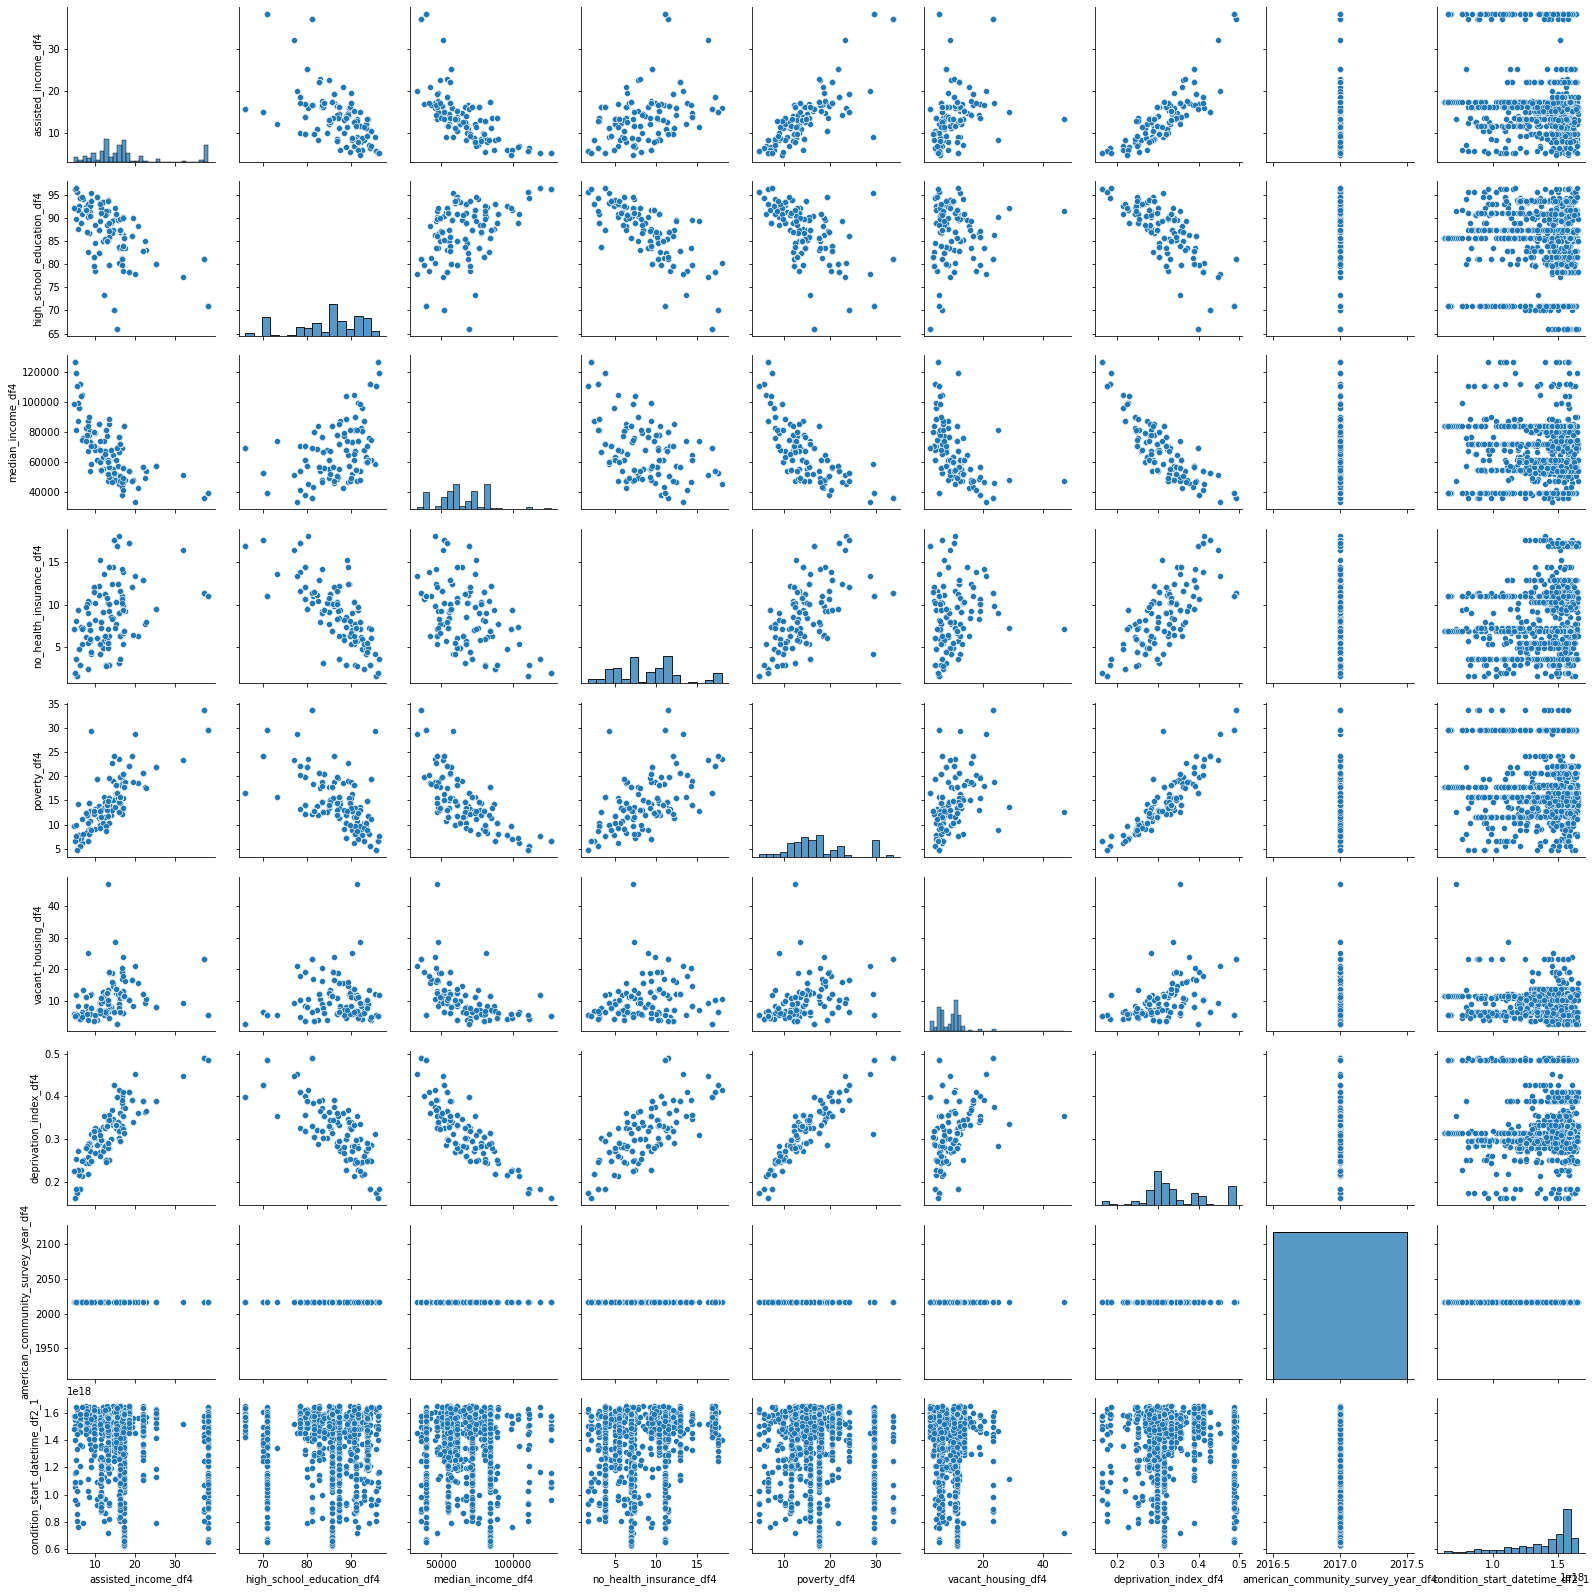

In [40]:
# Show all data in a pairplot
sns.pairplot(combined_df)
plt.show()

In [47]:
# Value count for ethnicity

combined_df.value_counts("ethnicity_df3")

ethnicity_df3
Not Hispanic or Latino                               534
Hispanic or Latino                                   437
PMI: Skip                                             14
What Race Ethnicity: Race Ethnicity None Of These      8
PMI: Prefer Not To Answer                              7
dtype: int64

In [46]:
# Value count for race
combined_df.value_counts("race_df3")

race_df3
None Indicated                               404
White                                        347
Black or African American                    150
Asian                                         42
More than one population                      24
PMI: Skip                                     14
None of these                                  8
I prefer not to answer                         7
Middle Eastern or North African                3
Native Hawaiian or Other Pacific Islander      1
dtype: int64

Text(0, 0.5, 'Count')

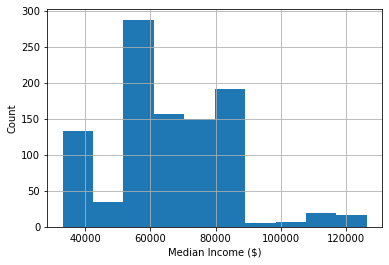

In [73]:
# Income
plt.figure(figsize=(6,4))
combined_df.median_income_df4.hist()
plt.xlabel('Median Income ($)')
plt.ylabel('Count')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 65.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 67.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 41.8% of the points cannot be placed; y

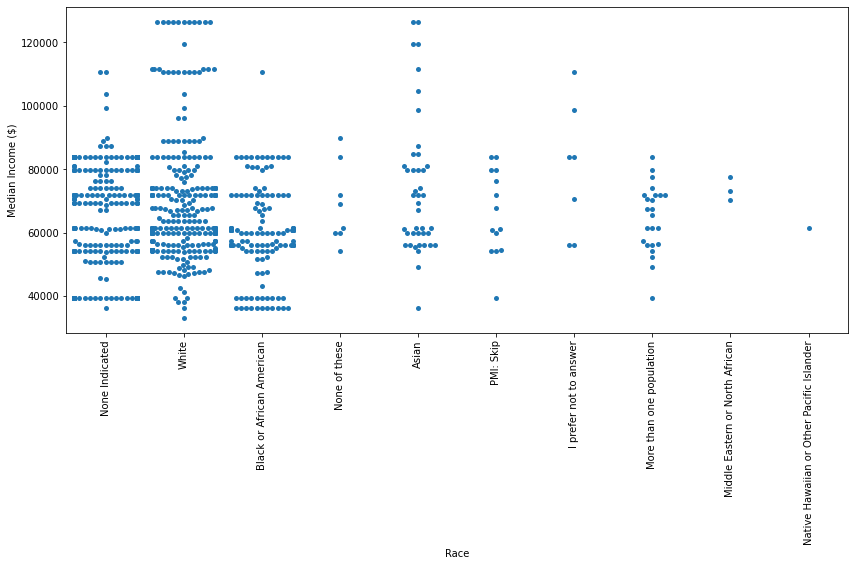

In [79]:
# Swarm plot for race & median income
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.race_df3,
             y = combined_df.median_income_df4)
plt.xlabel("Race")
plt.ylabel("Median Income ($)")
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 48.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


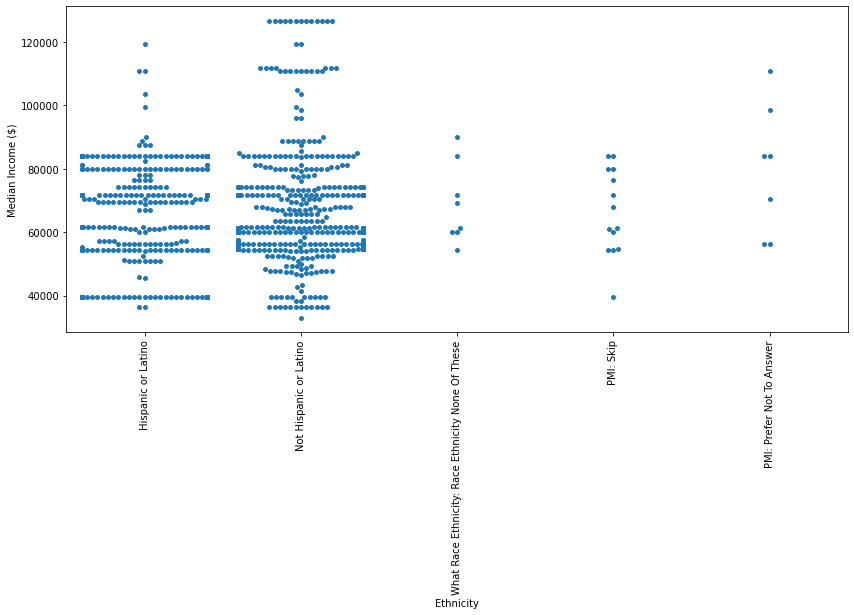

In [80]:
# Swarm plot for race & median income
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.ethnicity_df3,
             y = combined_df.median_income_df4)
plt.xlabel("Ethnicity")
plt.ylabel("Median Income ($)")
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Count')

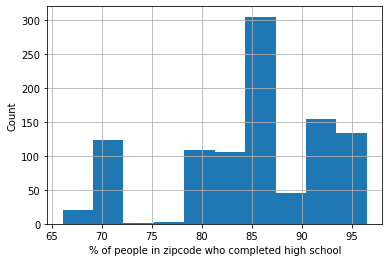

In [83]:
# Education
plt.figure(figsize=(6,4))
combined_df.high_school_education_df4.hist()
plt.xlabel('% of people in zipcode who completed high school')
plt.ylabel('Count')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 38.9% of the points cannot be placed; y

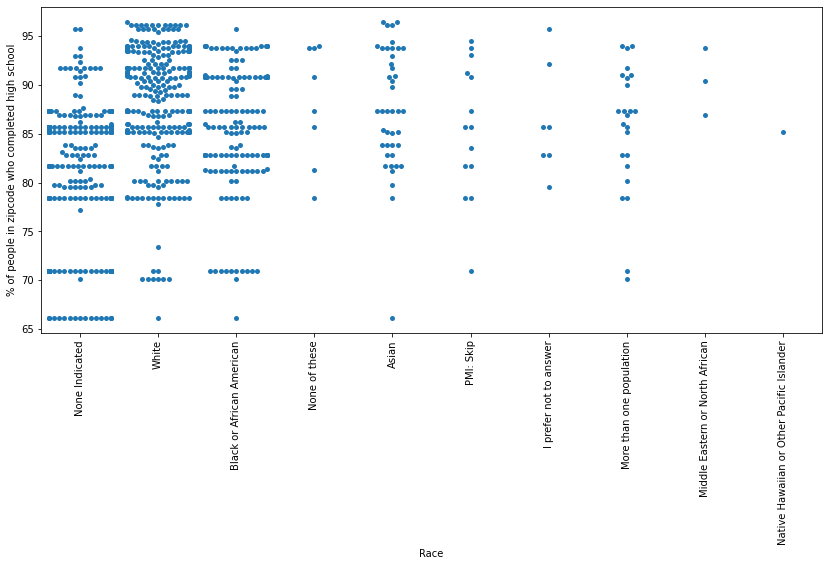

In [43]:
# Swarm plot for race & education
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.race_df3,
             y = combined_df.high_school_education_df4)
plt.xlabel("Race")
plt.ylabel("% of people in zipcode who completed high school")
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3543: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


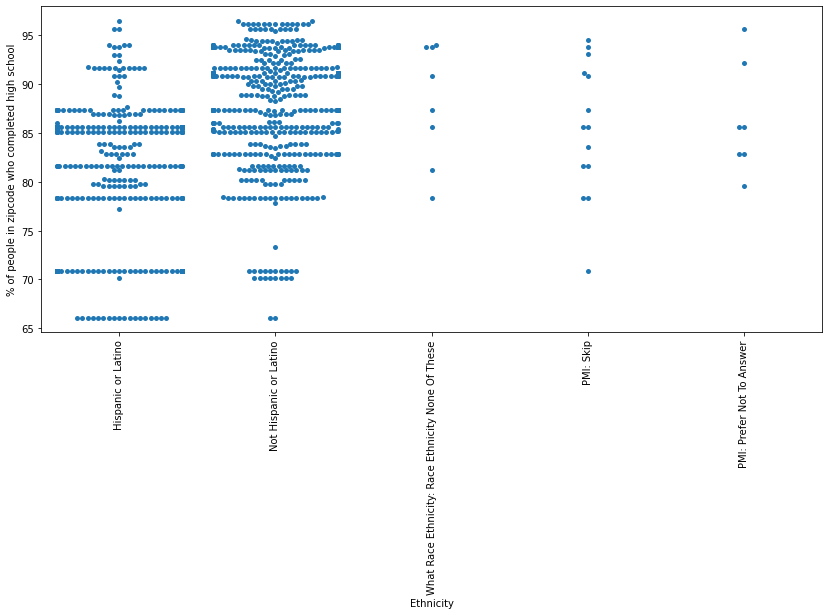

In [44]:
# Swarm plot for ethnicity & education
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.ethnicity_df3,
             y = combined_df.high_school_education_df4)
plt.xlabel("Ethnicity")
plt.ylabel("% of people in zipcode who completed high school")
plt.xticks(rotation=90)
plt.show()

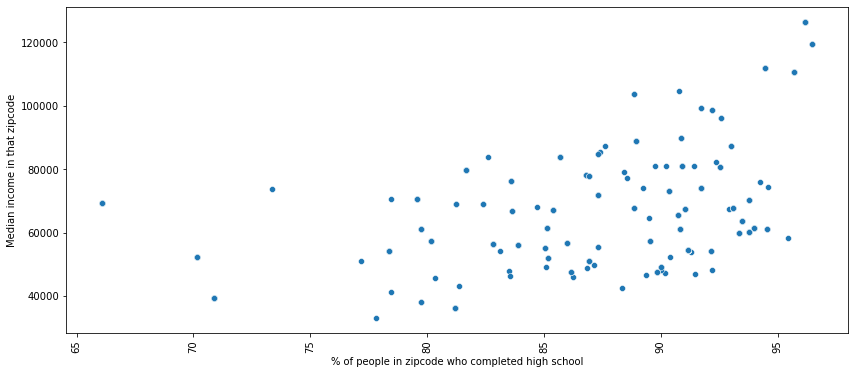

In [47]:
# Scatter plot for education & income
sns.scatterplot(data = combined_df,
                vars=[]
                
                x = combined_df.high_school_education_df4,
                y = combined_df.median_income_df4)
sns.pairplot(dataset_copy, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'], hue = "Outcome", markers=["o", "s"])

plt.xlabel("% of people in zipcode who completed high school")
plt.ylabel("Median income in that zipcode")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

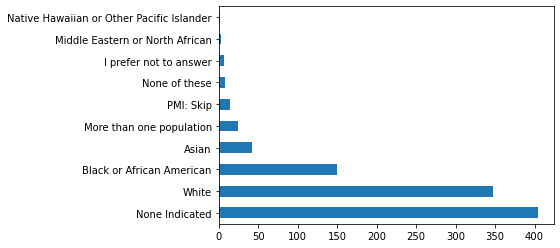

In [48]:
# Bar plot for race

combined_df.race_df3.value_counts().plot(kind = 'barh')


<AxesSubplot:>

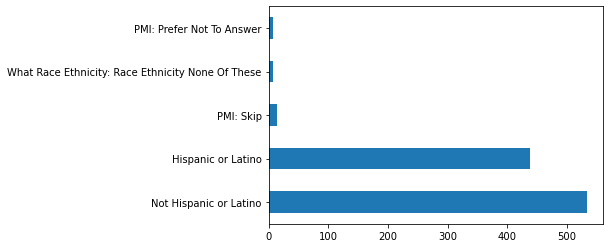

In [49]:
# Bar plot for ethnicity

combined_df.ethnicity_df3.value_counts().plot(kind = 'barh')


### The cells below are from previous work. Maintaining for posterity

In [ ]:
#Double check what is the index of each data frame... Df_names based on concept sets from All of Us. 
dataframes = [df1, df2, df3, df4]
df_names = ['survey_df', 'condition_df', 'person_df', 'zipcode_df']

for df_names, dataframe in zip(df_names, dataframes):
    print(f"{df_names}: Index column: {dataframe.index.name}")

#zip puts together the names of the dataframes and the list of dataframes
#so that the loop returns the names of the dataframe       

In [ ]:
# print(df1.columns) code used to check for all column names in dataframe    

#Set index for each dataframe to "person_id" or print that person_id is not found in any column of the dataframe.
dataframes = [df1, df2, df3, df4]
df_names = ['survey_df', 'condition_df', 'person_df', 'zipcode_df']

for df_names, dataframe in zip (df_names, dataframes):
    if dataframe.index.name == 'person_id':
        print(f" {df_names} index is person_id")
              
    elif 'person_id' in dataframe.columns:
        dataframe.set_index('person_id', inplace=True)
        print(f"'person_id' is now the index for {df_names}")
              
    else: 
        print (f" person_id not found in {df_names}")        

In [ ]:
#Check for duplicate person_id, indicative of multiple rows per person_id. Duplicates will need to be 
#resolved before dataframes can be merged together.

dataframes = [df1, df2, df3, df4]
df_names = ['survey_df', 'condition_df', 'person_df', 'zipcode_df']

for df_names, dataframe in zip(df_names, dataframes):
    duplicates = dataframe.index[dataframe.index.duplicated(keep=False)]
    if not duplicates.empty:
        print(f" {df_names} has duplicate 'person_id' values in the index:")
        print(duplicates)

In [ ]:
#df3 (survey) and df4 (zipcode) do not have multiple rows per index (person_id) so they can be joined right away


join_df = df3.join(df4, how='inner')

#Resets the index to a regular column and keeps person_id as a column
join_df.reset_index(inplace=True)

#Rename columns if they have the same name in both dataframes:
join_df = join_df.add_suffix('_df4')

join_df.head(20)

In [ ]:
#We need to clean up the multiple rows per person... Here is an example of what multiple rows for one person looks like.
#This individual had three births, represented by 5 lines. We need to decide how to treat this. For example, changing the
#person id to be 2920867a, 2920867b, 2920867c. Also probably need to drop "single live birth" when "preterm birth" is 
#present for the same date (key is knowing how the data is recorded), and "single live birth" and "outcome of delivery:
#single liveborn" is also a duplicate, so we would probably drop the latter condition label... 
 
person_id = 2920867

# Filter the DataFrame to get all rows for the specific person_id using .loc
person_data = df2.loc[df2.index == person_id]

# Print the filtered DataFrame
print(person_data)


In [ ]:
# Here is my outline for approaching this:
#   1) Create dictionaries for df1, df2, df3, df4 which note the values of person_id and their multiplicities
#   2) Create a list of values of person_id which occur in all four data frames
#   3) Construct a new data frame (in stages) from the list created in step 2.

In [ ]:
#Each dataframe needs to be reshaped individually in order to put multiple person_id rows into one row per person. Note that 
#because we do not want to aggregate or sum data, that this will result in new columns and duplicate columns will be renamed
#e.g. survey, survey_2, and so on.

#Only condition and survey have duplicate rows

#Each dataframe needs to be reshaped individually in order to put multiple person_id rows into one row per person, 
#before they are merged into one super dataframe. Don't make this a loop or you will die waiting. 

#I think we need to reduce rows first because this code takes forever to run and I'm not even sure it works

import pandas as pd

dataframes = [df1, df2]
df_names = ["survey_df", "condition_df"]

# Create an empty DataFrame to store the reshaped data
reshaped_df1 = pd.DataFrame()

# Iterate through each 'person_id' in the index
for person_id in df1.index.unique():
    # Extract the data for the specific 'person_id'
    person_data = df1.loc[person_id]

    # Reset the index to get a unique integer index, but keep 'person_id' data as a new column
    person_data = person_data.reset_index(drop=False)

    # Rename the columns for this person with suffix _X
    person_data.columns = [f"{col}_{i}" for i, col in enumerate(person_data.columns)]

    # Add the person's data as a row in the reshaped DataFrame
    reshaped_df1 = pd.concat([reshaped_df1, person_data], axis=1)

# Transpose the reshaped DataFrame to have 'person_id' as the index
reshaped_df1 = reshaped_df1.T

# Reset the index so that 'person_id' becomes a regular column
reshaped_df1.reset_index(inplace=True)

# Rename the columns to match your requirements
reshaped_df1.columns = ['person_id'] + reshaped_df1.columns[1:]

# Optional: Reset the index to have continuous integers
# reshaped_df1.reset_index(drop=True, inplace=True)

# Print the reshaped DataFrame
reshaped_df1.head(20)



In [ ]:
# Create an empty DataFrame to store the reshaped data
reshaped_df2 = pd.DataFrame()

# Iterate through each 'person_id' in the index
for person_id in df2.index.unique():
    # Extract the data for the specific 'person_id'
    person_data = df2.loc[person_id]

    # Reset the index to get a unique integer index, but keep 'person_id' data as a new column
    person_data = person_data.reset_index(drop=False)

    # Rename the columns for this person with suffix _X
    person_data.columns = [f"{col}_{i}" for i, col in enumerate(person_data.columns)]

    # Add the person's data as a row in the reshaped DataFrame
    reshaped_df2 = pd.concat([reshaped_df2, person_data], axis=1)

# Transpose the reshaped DataFrame to have 'person_id' as the index
reshaped_df2 = reshaped_df2.T

# Reset the index so that 'person_id' becomes a regular column
reshaped_df2.reset_index(inplace=True)

# Rename the columns to match your requirements
reshaped_df2.columns = ['person_id'] + reshaped_df2.columns[1:]

# Optional: Reset the index to have continuous integers
# reshaped_df2.reset_index(drop=True, inplace=True)

# Print the reshaped DataFrame
reshaped_df2.head(20)


In [ ]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "survey" and was generated for All of Us Controlled Tier Dataset v7
dataset_96162923_survey_sql = """
    SELECT
        answer.person_id,
        answer.survey_datetime,
        answer.survey,
        answer.question_concept_id,
        answer.question,
        answer.answer_concept_id,
        answer.answer,
        answer.survey_version_concept_id,
        answer.survey_version_name  
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.ds_survey` answer   
    WHERE
        (
            question_concept_id IN (
                SELECT
                    DISTINCT concept_id 
                FROM
                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                JOIN
                    (
                        select
                            cast(cr.id as string) as id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                        WHERE
                            concept_id IN (
                                1586134,43528895,40192389
                            ) 
                            AND domain_id = 'SURVEY'
                    ) a 
                        ON (
                            c.path like CONCAT('%',
                        a.id,
                        '.%')) 
                    WHERE
                        domain_id = 'SURVEY' 
                        AND type = 'PPI' 
                        AND subtype = 'QUESTION'
                    )
            )  
            AND (
                answer.PERSON_ID IN (
                    SELECT
                        distinct person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                    WHERE
                        cb_search_person.person_id IN (
                            SELECT
                                criteria.person_id 
                            FROM
                                (SELECT
                                    DISTINCT person_id,
                                    entry_date,
                                    concept_id 
                                FROM
                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                WHERE
                                    (
                                        concept_id IN (
                                            SELECT
                                                DISTINCT c.concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                            JOIN
                                                (
                                                    select
                                                        cast(cr.id as string) as id 
                                                    FROM
                                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                    WHERE
                                                        concept_id IN (36712702, 45757176, 4014295) 
                                                        AND full_text LIKE '%_rank1]%'
                                                ) a 
                                                    ON (
                                                        c.path LIKE CONCAT('%.',
                                                    a.id,
                                                    '.%') 
                                                    OR c.path LIKE CONCAT('%.',
                                                    a.id) 
                                                    OR c.path LIKE CONCAT(a.id,
                                                    '.%') 
                                                    OR c.path = a.id) 
                                                WHERE
                                                    is_standard = 1 
                                                    AND is_selectable = 1
                                                ) 
                                                AND is_standard = 1 
                                        )
                                    ) criteria 
                                ) ))"""

dataset_96162923_survey_df = pandas.read_gbq(
    dataset_96162923_survey_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_96162923_survey_df.head(5)

In [ ]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "condition" and was generated for All of Us Controlled Tier Dataset v7
dataset_96162923_condition_sql = """
    SELECT
        c_occurrence.person_id,
        c_occurrence.condition_concept_id,
        c_standard_concept.concept_name as standard_concept_name,
        c_standard_concept.concept_code as standard_concept_code,
        c_standard_concept.vocabulary_id as standard_vocabulary,
        c_occurrence.condition_start_datetime,
        c_occurrence.condition_end_datetime,
        c_occurrence.condition_type_concept_id,
        c_type.concept_name as condition_type_concept_name,
        c_occurrence.stop_reason,
        c_occurrence.visit_occurrence_id,
        visit.concept_name as visit_occurrence_concept_name,
        c_occurrence.condition_source_value,
        c_occurrence.condition_source_concept_id,
        c_source_concept.concept_name as source_concept_name,
        c_source_concept.concept_code as source_concept_code,
        c_source_concept.vocabulary_id as source_vocabulary,
        c_occurrence.condition_status_source_value,
        c_occurrence.condition_status_concept_id,
        c_status.concept_name as condition_status_concept_name 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.condition_occurrence` c_occurrence 
        WHERE
            (
                condition_concept_id IN  (
                    SELECT
                        DISTINCT c.concept_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    JOIN
                        (
                            select
                                cast(cr.id as string) as id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            WHERE
                                concept_id IN (
                                    36712702, 4014295, 4040733, 4127852, 4129479, 4217564, 4282746, 432441, 43531419, 436740, 441077, 44784550, 45757175, 45757176
                                ) 
                                AND full_text LIKE '%_rank1]%'
                        ) a 
                            ON (
                                c.path LIKE CONCAT('%.',
                            a.id,
                            '.%') 
                            OR c.path LIKE CONCAT('%.',
                            a.id) 
                            OR c.path LIKE CONCAT(a.id,
                            '.%') 
                            OR c.path = a.id) 
                        WHERE
                            is_standard = 1 
                            AND is_selectable = 1
                        )
                )  
                AND (
                    c_occurrence.PERSON_ID IN (
                        SELECT
                            distinct person_id  
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                        WHERE
                            cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (
                                                SELECT
                                                    DISTINCT c.concept_id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                                JOIN
                                                    (
                                                        select
                                                            cast(cr.id as string) as id 
                                                        FROM
                                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                        WHERE
                                                            concept_id IN (36712702, 45757176, 4014295) 
                                                            AND full_text LIKE '%_rank1]%'
                                                    ) a 
                                                        ON (
                                                            c.path LIKE CONCAT('%.',
                                                        a.id,
                                                        '.%') 
                                                        OR c.path LIKE CONCAT('%.',
                                                        a.id) 
                                                        OR c.path LIKE CONCAT(a.id,
                                                        '.%') 
                                                        OR c.path = a.id) 
                                                    WHERE
                                                        is_standard = 1 
                                                        AND is_selectable = 1
                                                    ) 
                                                    AND is_standard = 1 
                                            )
                                        ) criteria 
                                    ) ))
                        ) c_occurrence 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_standard_concept 
                            ON c_occurrence.condition_concept_id = c_standard_concept.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_type 
                            ON c_occurrence.condition_type_concept_id = c_type.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                            ON c_occurrence.visit_occurrence_id = v.visit_occurrence_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` visit 
                            ON v.visit_concept_id = visit.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_source_concept 
                            ON c_occurrence.condition_source_concept_id = c_source_concept.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_status 
                            ON c_occurrence.condition_status_concept_id = c_status.concept_id"""

dataset_96162923_condition_df = pandas.read_gbq(
    dataset_96162923_condition_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_96162923_condition_df.head(5)

In [ ]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "person" and was generated for All of Us Controlled Tier Dataset v7
dataset_96162923_person_sql = """
    SELECT
        person.person_id,
        person.gender_concept_id,
        p_gender_concept.concept_name as gender,
        person.birth_datetime as date_of_birth,
        person.race_concept_id,
        p_race_concept.concept_name as race,
        person.ethnicity_concept_id,
        p_ethnicity_concept.concept_name as ethnicity,
        person.sex_at_birth_concept_id,
        p_sex_at_birth_concept.concept_name as sex_at_birth 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.person` person 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_gender_concept 
            ON person.gender_concept_id = p_gender_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_race_concept 
            ON person.race_concept_id = p_race_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_ethnicity_concept 
            ON person.ethnicity_concept_id = p_ethnicity_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_sex_at_birth_concept 
            ON person.sex_at_birth_concept_id = p_sex_at_birth_concept.concept_id  
    WHERE
        person.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) )  
                    AND (person.PERSON_ID IN (SELECT
                        DISTINCT person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` 
                    WHERE
                        has_ehr_data = 1))"""

dataset_96162923_person_df = pandas.read_gbq(
    dataset_96162923_person_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_96162923_person_df.head(5)

In [ ]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "zip_code_socioeconomic" and was generated for All of Us Controlled Tier Dataset v7
dataset_96162923_zip_code_socioeconomic_sql = """
    SELECT
        observation.person_id,
        observation.observation_datetime,
        zip_code.zip3_as_string as zip_code,
        zip_code.fraction_assisted_income as assisted_income,
        zip_code.fraction_high_school_edu as high_school_education,
        zip_code.median_income,
        zip_code.fraction_no_health_ins as no_health_insurance,
        zip_code.fraction_poverty as poverty,
        zip_code.fraction_vacant_housing as vacant_housing,
        zip_code.deprivation_index,
        zip_code.acs as american_community_survey_year 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.zip3_ses_map` zip_code 
    JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.observation` observation 
            ON CAST(SUBSTR(observation.value_as_string,
        0,
        STRPOS(observation.value_as_string,
        '*') - 1) AS INT64) = zip_code.zip3  
    WHERE
        observation.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) ) 
                    AND observation_source_concept_id = 1585250 
                    AND observation.value_as_string NOT LIKE 'Res%'"""

dataset_96162923_zip_code_socioeconomic_df = pandas.read_gbq(
    dataset_96162923_zip_code_socioeconomic_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_96162923_zip_code_socioeconomic_df.head(5)

In [ ]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "survey" and was generated for All of Us Controlled Tier Dataset v7
dataset_60478925_survey_sql = """
    SELECT
        answer.person_id,
        answer.survey_datetime,
        answer.survey,
        answer.question_concept_id,
        answer.question,
        answer.answer_concept_id,
        answer.answer,
        answer.survey_version_concept_id,
        answer.survey_version_name  
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.ds_survey` answer   
    WHERE
        (
            question_concept_id IN (
                SELECT
                    DISTINCT concept_id 
                FROM
                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                JOIN
                    (
                        select
                            cast(cr.id as string) as id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                        WHERE
                            concept_id IN (
                                1586134,43528895,40192389
                            ) 
                            AND domain_id = 'SURVEY'
                    ) a 
                        ON (
                            c.path like CONCAT('%',
                        a.id,
                        '.%')) 
                    WHERE
                        domain_id = 'SURVEY' 
                        AND type = 'PPI' 
                        AND subtype = 'QUESTION'
                    )
            )  
            AND (
                answer.PERSON_ID IN (
                    SELECT
                        distinct person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                    WHERE
                        cb_search_person.person_id IN (
                            SELECT
                                criteria.person_id 
                            FROM
                                (SELECT
                                    DISTINCT person_id,
                                    entry_date,
                                    concept_id 
                                FROM
                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                WHERE
                                    (
                                        concept_id IN (
                                            SELECT
                                                DISTINCT c.concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                            JOIN
                                                (
                                                    select
                                                        cast(cr.id as string) as id 
                                                    FROM
                                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                    WHERE
                                                        concept_id IN (36712702, 45757176, 4014295) 
                                                        AND full_text LIKE '%_rank1]%'
                                                ) a 
                                                    ON (
                                                        c.path LIKE CONCAT('%.',
                                                    a.id,
                                                    '.%') 
                                                    OR c.path LIKE CONCAT('%.',
                                                    a.id) 
                                                    OR c.path LIKE CONCAT(a.id,
                                                    '.%') 
                                                    OR c.path = a.id) 
                                                WHERE
                                                    is_standard = 1 
                                                    AND is_selectable = 1
                                                ) 
                                                AND is_standard = 1 
                                        )
                                    ) criteria 
                                ) ))"""

dataset_60478925_survey_df = pandas.read_gbq(
    dataset_60478925_survey_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_60478925_survey_df.head(5)

In [ ]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "condition" and was generated for All of Us Controlled Tier Dataset v7
dataset_60478925_condition_sql = """
    SELECT
        c_occurrence.person_id,
        c_occurrence.condition_concept_id,
        c_standard_concept.concept_name as standard_concept_name,
        c_standard_concept.concept_code as standard_concept_code,
        c_standard_concept.vocabulary_id as standard_vocabulary,
        c_occurrence.condition_start_datetime,
        c_occurrence.condition_end_datetime,
        c_occurrence.condition_type_concept_id,
        c_type.concept_name as condition_type_concept_name,
        c_occurrence.stop_reason,
        c_occurrence.visit_occurrence_id,
        visit.concept_name as visit_occurrence_concept_name,
        c_occurrence.condition_source_value,
        c_occurrence.condition_source_concept_id,
        c_source_concept.concept_name as source_concept_name,
        c_source_concept.concept_code as source_concept_code,
        c_source_concept.vocabulary_id as source_vocabulary,
        c_occurrence.condition_status_source_value,
        c_occurrence.condition_status_concept_id,
        c_status.concept_name as condition_status_concept_name 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.condition_occurrence` c_occurrence 
        WHERE
            (
                condition_concept_id IN  (
                    SELECT
                        DISTINCT c.concept_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    JOIN
                        (
                            select
                                cast(cr.id as string) as id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            WHERE
                                concept_id IN (
                                    36712702, 4014295, 432441, 44784550, 45757175, 45757176
                                ) 
                                AND full_text LIKE '%_rank1]%'
                        ) a 
                            ON (
                                c.path LIKE CONCAT('%.',
                            a.id,
                            '.%') 
                            OR c.path LIKE CONCAT('%.',
                            a.id) 
                            OR c.path LIKE CONCAT(a.id,
                            '.%') 
                            OR c.path = a.id) 
                        WHERE
                            is_standard = 1 
                            AND is_selectable = 1
                        )
                )  
                AND (
                    c_occurrence.PERSON_ID IN (
                        SELECT
                            distinct person_id  
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                        WHERE
                            cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (
                                                SELECT
                                                    DISTINCT c.concept_id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                                JOIN
                                                    (
                                                        select
                                                            cast(cr.id as string) as id 
                                                        FROM
                                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                        WHERE
                                                            concept_id IN (36712702, 45757176, 4014295) 
                                                            AND full_text LIKE '%_rank1]%'
                                                    ) a 
                                                        ON (
                                                            c.path LIKE CONCAT('%.',
                                                        a.id,
                                                        '.%') 
                                                        OR c.path LIKE CONCAT('%.',
                                                        a.id) 
                                                        OR c.path LIKE CONCAT(a.id,
                                                        '.%') 
                                                        OR c.path = a.id) 
                                                    WHERE
                                                        is_standard = 1 
                                                        AND is_selectable = 1
                                                    ) 
                                                    AND is_standard = 1 
                                            )
                                        ) criteria 
                                    ) ))
                        ) c_occurrence 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_standard_concept 
                            ON c_occurrence.condition_concept_id = c_standard_concept.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_type 
                            ON c_occurrence.condition_type_concept_id = c_type.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.visit_occurrence` v 
                            ON c_occurrence.visit_occurrence_id = v.visit_occurrence_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` visit 
                            ON v.visit_concept_id = visit.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_source_concept 
                            ON c_occurrence.condition_source_concept_id = c_source_concept.concept_id 
                    LEFT JOIN
                        `""" + os.environ["WORKSPACE_CDR"] + """.concept` c_status 
                            ON c_occurrence.condition_status_concept_id = c_status.concept_id"""

dataset_60478925_condition_df = pandas.read_gbq(
    dataset_60478925_condition_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_60478925_condition_df.head(5)

In [ ]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "person" and was generated for All of Us Controlled Tier Dataset v7
dataset_60478925_person_sql = """
    SELECT
        person.person_id,
        person.gender_concept_id,
        p_gender_concept.concept_name as gender,
        person.birth_datetime as date_of_birth,
        person.race_concept_id,
        p_race_concept.concept_name as race,
        person.ethnicity_concept_id,
        p_ethnicity_concept.concept_name as ethnicity,
        person.sex_at_birth_concept_id,
        p_sex_at_birth_concept.concept_name as sex_at_birth 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.person` person 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_gender_concept 
            ON person.gender_concept_id = p_gender_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_race_concept 
            ON person.race_concept_id = p_race_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_ethnicity_concept 
            ON person.ethnicity_concept_id = p_ethnicity_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_sex_at_birth_concept 
            ON person.sex_at_birth_concept_id = p_sex_at_birth_concept.concept_id  
    WHERE
        person.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) )  
                    AND (person.PERSON_ID IN (SELECT
                        DISTINCT person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` 
                    WHERE
                        has_ehr_data = 1))"""

dataset_60478925_person_df = pandas.read_gbq(
    dataset_60478925_person_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_60478925_person_df.head(5)

In [ ]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "zip_code_socioeconomic" and was generated for All of Us Controlled Tier Dataset v7
dataset_60478925_zip_code_socioeconomic_sql = """
    SELECT
        observation.person_id,
        observation.observation_datetime,
        zip_code.zip3_as_string as zip_code,
        zip_code.fraction_assisted_income as assisted_income,
        zip_code.fraction_high_school_edu as high_school_education,
        zip_code.median_income,
        zip_code.fraction_no_health_ins as no_health_insurance,
        zip_code.fraction_poverty as poverty,
        zip_code.fraction_vacant_housing as vacant_housing,
        zip_code.deprivation_index,
        zip_code.acs as american_community_survey_year 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.zip3_ses_map` zip_code 
    JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.observation` observation 
            ON CAST(SUBSTR(observation.value_as_string,
        0,
        STRPOS(observation.value_as_string,
        '*') - 1) AS INT64) = zip_code.zip3  
    WHERE
        observation.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) ) 
                    AND observation_source_concept_id = 1585250 
                    AND observation.value_as_string NOT LIKE 'Res%'"""

dataset_60478925_zip_code_socioeconomic_df = pandas.read_gbq(
    dataset_60478925_zip_code_socioeconomic_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

dataset_60478925_zip_code_socioeconomic_df.head(5)